# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [194]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# prelims
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # show all outputs

df.head()
df.info()
df.describe()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


__Q1.__ Is the distribution of body temperatures normal?  
    <ul><li>Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.</ul>
  

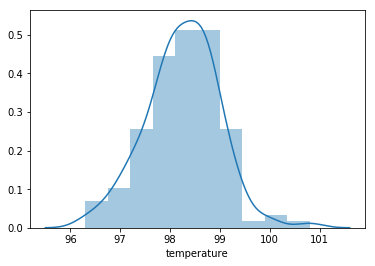

Ho: Distribution is Normal
Ha: Distribution is not Normal
D'Agostino-Pearson test for normality p-value: 0.2587


In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import normaltest

# histogram/distribution plot to look at distribution
sns.distplot(df['temperature'], bins=10)
plt.show()

# D'Agostino-Pearson test for normality
# Ho: Normal Distribution
# Ha: Non-Normal Distribution
print("Ho: Distribution is Normal")
print("Ha: Distribution is not Normal")
print("D'Agostino-Pearson test for normality p-value: {0}".format(round(normaltest(df['temperature'])[1], 4)))

__A1.__ The distribution looks fairly Normal. The p-value on the Normality test also indicates there is insufficient data to reject the null hypothesis at the alpha=0.05 level.

---

__Q2.__ Is the sample size large? Are the observations independent?
    <ul><li>Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.</ul>

In [196]:
# Sample size
print("Number of observations in data: {0}".format(df.shape[0]))
print("Number of male observations: {0}".format(df.loc[df['gender']=='M', 'gender'].count()))
print("Number of female observations: {0}".format(df.loc[df['gender']=='F', 'gender'].count()))

Number of observations in data: 130
Number of male observations: 65
Number of female observations: 65


__A2.__ "Large" is a relative term here, but in terms of CLT, it is large enough. There are 130 observations, separated evenly between genders. Because each observation is a different person, they are "independent."

---

__Q3.__ Is the true population mean really 98.6 degrees F?
<ul><li>Would you use a one-sample or two-sample test? Why?
<li>In this situation, is it appropriate to use the $t$ or $z$ statistic?
<li>Now try using the other test. How is the result be different? Why?</ul>

In [197]:
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest

print("Ho: Population mean temperature is 98.6 degrees (mu == 98.6)")
print("Ha: Population mean temperature is not 98.6 degrees (mu != 98.6)\n")

# z-test
z_result = ztest(df['temperature'], value=98.6)
print("p-value for two-sided z-test: {0}".format(z_result[1]))

# t-test
t_result = ttest_1samp(df['temperature'], popmean=98.6)
print("p-value for two-sided t-test: {0}".format(t_result[1]))

Ho: Population mean temperature is 98.6 degrees (mu == 98.6)
Ha: Population mean temperature is not 98.6 degrees (mu != 98.6)

p-value for two-sided z-test: 4.9021570141012155e-08
p-value for two-sided t-test: 2.4106320415561276e-07


__A3.__ The true population mean is not really 98.6 degrees F, since we reject the null hypothesis above (alpha=0.05), as our z-test p-value is 0.000000049.
<ul><li>The one-sample test is appropriate here because we only have one sample -- we are not comparing men and women at this point.
<li>Either statistic is fine to use in this case. Formally, the $t$ statistic _should_ be used, since the population parameters are unknown, but with more than about 30 observations, the $t$ and $z$ distributions are very similar. I think the answer the prompt is looking for is that the $z$ statistic is appropriate here because our sample is "large."
<li>The $t$ test result shows a slightly higher p-value becuase the tails on the Normal distribution are flatter than a $t$ distribution.</ul>
    
---

__Q4.__  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [198]:
print("Ho: Population mean temperature is 98.6 degrees (mu == 98.6)")
print("Ha: Population mean temperature is not 98.6 degrees (mu != 98.6)\n")

sample = df['temperature'].sample(10, random_state=42)
z_sample = ztest(sample, value=98.6)
print("p-value for two-sided z-test: {0}".format(round(z_sample[1], 4)))
t_sample = ttest_1samp(sample, popmean=98.6)
print("p-value for two-sided t-test: {0}".format(round(t_sample[1], 4)))

Ho: Population mean temperature is 98.6 degrees (mu == 98.6)
Ha: Population mean temperature is not 98.6 degrees (mu != 98.6)

p-value for two-sided z-test: 0.1186
p-value for two-sided t-test: 0.153


__A4.__ See the above results.
<ul><li>The correct test to use is the t-test because the sample size is so small and we don't know the population parameters.
    <li>The p-value for the t-test is slightly larger than the z-test's (as expected) and both fail to reject the null at the alpha = 0.05 level. This tells me that while a t-test is the correct test to use in this instance, smaller samples can fail to accurately estimate the population paramters.</ul>

---
        
__Q5.__ At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>        

In [199]:
# 95% confidence interval
from scipy.stats import norm

std = df['temperature'].std()
print("Standard deviation:", round(std, 4))

x_bar = df['temperature'].mean()
print("Mean:", round(x_bar, 4))

conf_int = norm.interval(0.95, loc=x_bar, scale=(std**.5))
print("95% Confidence Interval: ({0}, {1})".format(round(conf_int[0], 4), round(conf_int[1], 4)))


Standard deviation: 0.7332
Mean: 98.2492
95% Confidence Interval: (96.571, 99.9275)


__A5.__ Someone's temperature should be considered "abnormal" when it's below 96.57 or above 99.3 degrees, based on a 95% confidence interval and this data.

---

__Q6.__ Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [200]:
from numpy import mean

m_temp = df.loc[df['gender']=='M', 'temperature'].tolist()
f_temp = df.loc[df['gender']=='F', 'temperature'].tolist()

print("Ho: Genders have the same mean temperature (mean_m == mean_f)")
print("Ha: Genders do not have the same mean temperature (mean_m != mean_f)\n")

z_test = ztest(m_temp, f_temp)
print("mean_m: {0}".format(round(mean(m_temp), 4)))
print("mean_f: {0}\n".format(round(mean(f_temp), 4)))
print("p-value for two-sided z-test: {0}".format(round(z_test[1], 4)))

Ho: Genders have the same mean temperature (mean_m == mean_f)
Ha: Genders do not have the same mean temperature (mean_m != mean_f)

mean_m: 98.1046
mean_f: 98.3938

p-value for two-sided z-test: 0.0223


__A6.__ See the above hypothesis test.
<ul><li>There is a significant difference (at the alpha = 0.05 level) between the mean temperatures for men and women. I used a two-sied, two-sample z-test because there are two groups (male, female), the groups are sufficiently large to use the z- insted of t-test, and the question is about the equality of the groups' means (versus "mean_m > mean_f", etc., which would be one-sided).
<li>98.6 degrees Farenheit is regularly cited as the normal body temperature, but this is misleading for two reasons. First, this is not an accurate estimate of the true average body temperature of people today. Using a dataset representative of the current US adult population, we find that a better estimate is closer to 98.2 degrees Farenheit. This 0.4 degree difference may seem small, but it is large enough to be considered statistically significantly different: these two temperatures are very much not the same. Second, a single estimate for "normal" body temperature does not account for variations among individuals. Instead of using a single number, a range can tell us: "What is 'normal' for 95% of the population?" Based on this same data, we can see that a normal body temperature is somewhere etween 96.57 and 99.3 degrees. Because of all of this, the single-value 98.6 approach should be left behind in favor of a range centered around 98.2: normal is somewhere between 96.57 and 99.3.
</ul>
